In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

from tqdm import tqdm

from models import *

In [2]:
device = torch.device('cuda')

In [3]:
CELoss = lambda v, v_hat : -torch.mean(v * torch.log(v_hat) + (1 - v) * torch.log(1 - v_hat))

# Fine-Grained Model

In [4]:
fine = FineRBM(1, device)

# $A_1$ Representation

In [5]:
coarse_a1 = A1_RBM(device)

optimizer = torch.optim.Adam(coarse_a1.parameters(), lr=0.001)

losses = []
Js = []

In [6]:
iters = 10000
batch_n = 1

for i in tqdm(range(iters)):
    optimizer.zero_grad()

    x = fine.joint(n=batch_n).detach()
    x_hat = coarse_a1(x.bernoulli())

    loss = CELoss(x, x_hat)
    loss.backward()
    optimizer.step()

    if i % 32 == 0:
        losses.append(float(loss))
        Js.append(float(coarse_a1.J))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:24<00:00, 408.79it/s]


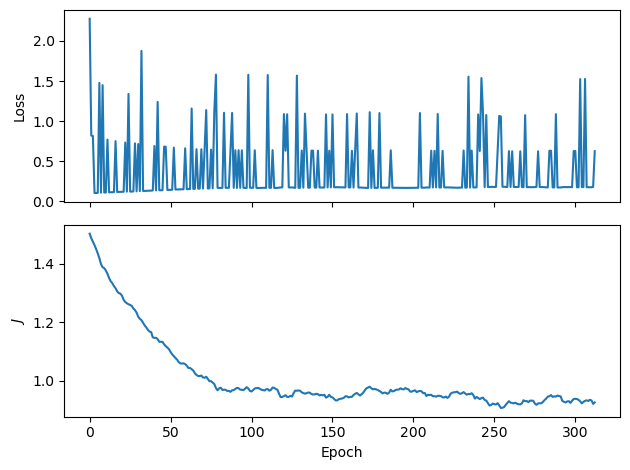

In [7]:
fig, (ax0, ax1) = plt.subplots(2, 1, sharex=True)
ax0.plot(losses)
ax0.set_ylabel('Loss')
ax1.plot(Js)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('$J$');

fig.tight_layout()

# $A_1 \oplus E$ Representation

In [8]:
coarse_a1e = A1_E_RBM(device)

optimizer = torch.optim.Adam(coarse_a1e.parameters(), lr=0.001)

losses = []
J_As = []
J_Es = []

In [9]:
iters = 10000
batch_n = 1

for i in tqdm(range(iters)):
    optimizer.zero_grad()

    x = fine.joint(n=batch_n).detach()
    x_hat = coarse_a1e(x.bernoulli())

    loss = CELoss(x, x_hat)
    loss.backward()
    optimizer.step()

    if i % 32 == 0:
        losses.append(float(loss))
        J_As.append(float(coarse_a1e.J_A))
        J_Es.append(float(coarse_a1e.J_E))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:24<00:00, 402.43it/s]


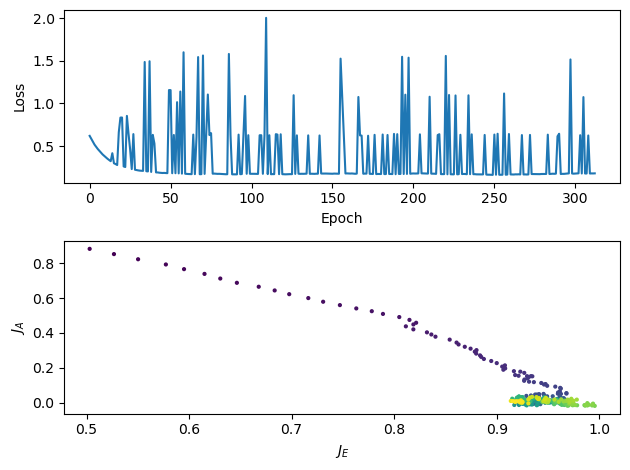

In [10]:
fig, (ax0, ax1) = plt.subplots(2, 1)
ax0.plot(losses)
ax0.set_xlabel('Epoch')
ax0.set_ylabel('Loss')
ax1.scatter(J_As, J_Es, c=range(len(J_As)), cmap='viridis', s=4)
ax1.set_xlabel('$J_E$')
ax1.set_ylabel('$J_A$');

fig.tight_layout()